In [ ]:
# Cloning the YOLOv8 repository
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 41109, done.
remote: Counting objects: 100% (1761/1761), done.
remote: Compressing objects: 100% (940/940), done.
remote: Total 41109 (delta 1197), reused 1236 (delta 816), pack-reused 39348 (from 1)
Receiving objects: 100% (41109/41109), 31.46 MiB | 9.96 MiB/s, done.
Resolving deltas: 100% (30302/30302), done.
/content/ultralytics


In [ ]:
# Installing YOLOv8 dependencies
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.9/871.9 kB 12.3 MB/s eta 0:00:00


In [ ]:
# Going to yolov5 directory
%cd /content/yolov5

/content/yolov5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml

# Defining the dataset configuration
dataset_config = {
    'train': "/content/drive/MyDrive/Traffic Dataset/images/train",
    'val': "/content/drive/MyDrive/Traffic Dataset/images/val",  # Update this path if you have a separate validation set
    'nc': 7,
    'names': ['Car', 'Number Plate', 'Blur Number Plate', 'Two Wheeler', 'Auto', 'Bus', 'Truck']
}

# Specify the path for dataset.yaml
yaml_path = r'/content/dataset.yaml'

# Write the YAML content to the file
with open(yaml_path, 'w') as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print(f"dataset.yaml has been saved to: {yaml_path}")


dataset.yaml has been saved to: /content/dataset.yaml


In [ ]:
# Train a model with your custom dataset
!yolo train model=yolov8n.pt data=your_dataset.yaml epochs=100 imgsz=640

100%|██████████| 6.25M/6.25M [00:00<00:00, 44.7MB/s]


FileNotFoundError: image.jpg does not exist

In [ ]:
# Training the model
!python train.py --img 640 --batch 16 --epochs 50 --data /content/dataset.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
 20                -1  1    296448  models.common.C3                        [256, 256, 1, False]          
 21                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1182720  models.common.C3                        [512, 512, 1, False]          
 24      [17, 20, 23]  1     32364  models.yolo.Detect                      [7, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model summary: 214 layers, 7038508 parameters, 7038508 gradients, 16.0 GFLOPs

Transferred 343/349 items from yolov5s.pt
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/co

In [ ]:
# Imporing necessary libraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [ ]:
# Locating the latest training directory and reviewing the results:

# Finding the most recent training directory
list_of_files = glob.glob('/content/yolov5/runs/train/exp')
latest_dir = max(list_of_files, key=os.path.getctime)

# Loading the results.csv file from the latest directory
results_path = os.path.join(latest_dir, '/results.csv')
if os.path.exists(results_path):
    data = pd.read_csv(results_path)
    # Printing the last row of metrics, which represents the final epoch's performance
    print(data.iloc[-1])
else:
    print("Results file not found. Make sure training has completed successfully.")

Results file not found. Make sure training has completed successfully.


In [ ]:
data = pd.read_csv("/content/yolov5/runs/train/exp/results.csv")

In [ ]:
data.iloc[-1]

,49
epoch,49.000000
train/box_loss,0.026711
train/obj_loss,0.058185
train/cls_loss,0.005360
metrics/precision,0.768490
metrics/recall,0.767170
metrics/mAP_0.5,0.810070
metrics/mAP_0.5:0.95,0.529280
val/box_loss,0.028543
val/obj_loss,0.053867


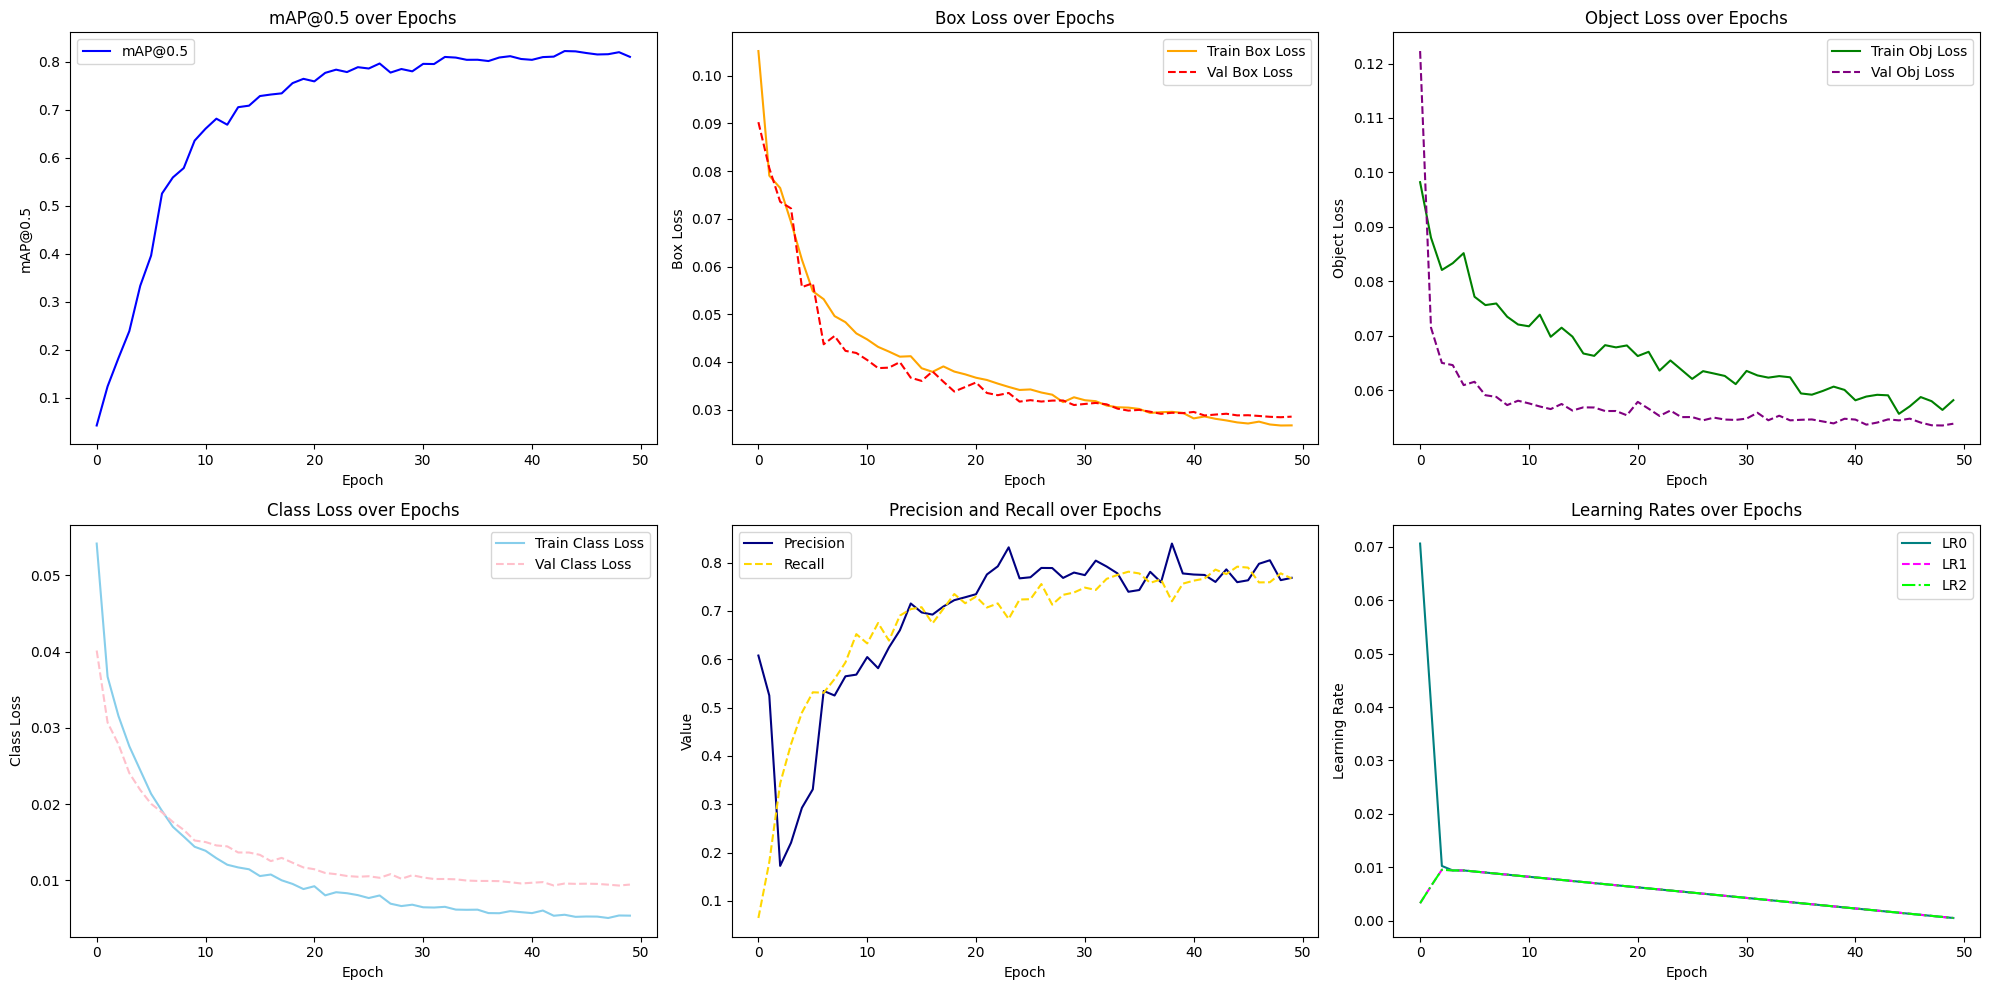

In [ ]:
# Plotting results

results = pd.read_csv("/content/yolov5/runs/train/exp/results.csv")

# Plotting
plt.figure(figsize=(20, 10))

# Subplot 1: mAP@0.5 over epochs
plt.subplot(2, 3, 1)
plt.plot(results['               epoch'], results['     metrics/mAP_0.5'], label='mAP@0.5', color='blue')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.title('mAP@0.5 over Epochs')
plt.legend()

# Subplot 2: Training and Validation Box Loss
plt.subplot(2, 3, 2)
plt.plot(results['               epoch'], results['      train/box_loss'], label='Train Box Loss', color='orange')
plt.plot(results['               epoch'], results['        val/box_loss'], label='Val Box Loss', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss over Epochs')
plt.legend()

# Subplot 3: Training and Validation Object Loss
plt.subplot(2, 3, 3)
plt.plot(results['               epoch'], results['      train/obj_loss'], label='Train Obj Loss', color='green')
plt.plot(results['               epoch'], results['        val/obj_loss'], label='Val Obj Loss', linestyle='--', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Object Loss')
plt.title('Object Loss over Epochs')
plt.legend()

# Subplot 4: Training and Validation Class Loss
plt.subplot(2, 3, 4)
plt.plot(results['               epoch'], results['      train/cls_loss'], label='Train Class Loss', color='skyblue')
plt.plot(results['               epoch'], results['        val/cls_loss'], label='Val Class Loss', linestyle='--', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss over Epochs')
plt.legend()

# Subplot 5: Precision and Recall
plt.subplot(2, 3, 5)
plt.plot(results['               epoch'], results['   metrics/precision'], label='Precision', color='navy')
plt.plot(results['               epoch'], results['      metrics/recall'], label='Recall', linestyle='--', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Precision and Recall over Epochs')
plt.legend()

# Subplot 6: Learning Rates
plt.subplot(2, 3, 6)
plt.plot(results['               epoch'], results['               x/lr0'], label='LR0', color='teal')
plt.plot(results['               epoch'], results['               x/lr1'], label='LR1', linestyle='--', color='magenta')
plt.plot(results['               epoch'], results['               x/lr2'], label='LR2', linestyle='-.', color='lime')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Testing the trained model on new images:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Traffic Dataset/images/test/00 (1).png

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Traffic Dataset/images/test/00 (1).png'


In [ ]:
from IPython.display import Image, display

# The latest detection results are in "runs/detect/exp"
output_dir = '/content/yolov5/runs/train/exp'
output_images = os.listdir(output_dir)

# Loop through all detected images and display them
for image_name in output_images:
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        display(Image(filename=os.path.join(output_dir, image_name)))

In [ ]:
!pip install ultralytics --upgrade

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 13 18:12:13 2024

@author: daffa
"""

import cv2
import torch
from ultralytics import YOLO
# Load YOLOv5 model
model = YOLO("/content/yolov5/runs/train/exp/weights/best.pt")

# Open video file
cap = cv2.VideoCapture(r"/content/sample_data/Road traffic video for object recognition.mp4")

# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Render results on frame
    annotated_frame = results.render()[0]

    # Write the frame with detections
    out.write(annotated_frame)

    # Display the frame
    cv2.imshow('Frame', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()


TypeError: BaseModel.fuse() got an unexpected keyword argument 'verbose'

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/sample_data/road.mp4


Streaming output truncated to the last 5000 lines.
video 1/1 (46204/51201) /content/sample_data/road.mp4: 384x640 9 Cars, 9.4ms
video 1/1 (46205/51201) /content/sample_data/road.mp4: 384x640 7 Cars, 10.2ms
video 1/1 (46206/51201) /content/sample_data/road.mp4: 384x640 8 Cars, 1 Blur Number Plate, 12.3ms
video 1/1 (46207/51201) /content/sample_data/road.mp4: 384x640 8 Cars, 1 Number Plate, 1 Blur Number Plate, 15.1ms
video 1/1 (46208/51201) /content/sample_data/road.mp4: 384x640 6 Cars, 1 Blur Number Plate, 10.7ms
video 1/1 (46209/51201) /content/sample_data/road.mp4: 384x640 7 Cars, 1 Blur Number Plate, 8.3ms
video 1/1 (46210/51201) /content/sample_data/road.mp4: 384x640 7 Cars, 9.7ms
video 1/1 (46211/51201) /content/sample_data/road.mp4: 384x640 7 Cars, 1 Blur Number Plate, 11.3ms
video 1/1 (46212/51201) /content/sample_data/road.mp4: 384x640 7 Cars, 1 Blur Number Plate, 10.2ms
video 1/1 (46213/51201) /content/sample_data/road.mp4: 384x640 9 Cars, 1 Blur Number Plate, 11.0ms
video 1/1

In [ ]:
import os

# Check if the processed video file exists
output_path = '/content/yolov5/runs/detect/exp/road.mp4'
print("File exists:", os.path.exists(output_path))

File exists: True


In [ ]:
from IPython.display import Video

# Display the processed video
Video(output_path, embed=True)